In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats.stats import pearsonr
from scipy.linalg import lstsq

#### Background
A method for predicting IQ as soon as possible after birth could be important for early intervention in cases such as brain abnormalities or learning disabilities. It has been thought that greater infant vocalization (for instance, more crying) is associated with higher IQ. In 1964, a study was undertaken to see if IQ at 3 years of age is associated with amount of crying at newborn age. In the study, 38 newborns were made to cry after being tapped on the foot and the number of distinct cry vocalizations within 20 seconds was counted. The subjects were followed up at 3 years of age and their IQs were measured.

In [2]:
DATA_DIR = "../Datasets/"

In [3]:
data = pd.read_excel(os.path.join(DATA_DIR, "baby-crying-IQ.xls"))

In [4]:
data.head()

,cry count,IQ
0,10,87
1,20,90
2,17,94
3,12,94
4,12,97


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
cry count    38 non-null int64
IQ           38 non-null int64
dtypes: int64(2)
memory usage: 688.0 bytes


In [6]:
data.describe()

,cry count,IQ
count,38.000000,38.000000
mean,17.236842,117.236842
std,5.069433,19.382960
min,9.000000,87.000000
25%,13.250000,103.250000
50%,16.000000,112.500000
75%,19.750000,130.000000
max,31.000000,162.000000


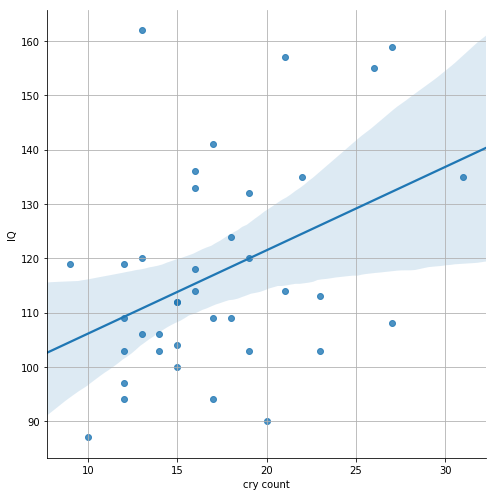

In [15]:
facet = sns.lmplot(data=data, x="cry count", y="IQ", fit_reg=True, height=10, size=7)
plt.grid()
plt.show()

In [17]:
r, p_value = pearsonr(data["cry count"], data["IQ"])

In [18]:
print("Strength of Linear Relationship(Pearson Correlation Coefficient) : ", r)
print("p_value for the above observation : ", p_value)

Strength of Linear Relationship(Pearson Correlation Coefficient) :  0.401818495052622
p_value for the above observation :  0.012397393906860794


In [50]:
# Linear Regression Model
lr = LinearRegression()
X = data["cry count"].values.reshape(-1,1)
y = data["IQ"].values.reshape(-1,1)
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
print("Slope : ", lr.coef_[0][0])
print("Intercept : ", lr.intercept_[0])

Slope :  1.5363518113635732
Intercept :  90.7549885146542


In [54]:
y_pred = lr.predict(X)

In [55]:
# Total sum of errors
ssr = np.sum((y_pred - y)**2)
print("Total sum of errors : ", ssr)

Total sum of errors :  11656.460576204578


In [57]:
# sum of the square of residuals
sst = np.sum((y - np.mean(y))**2)
print("Sum of the square of residuals : ", sst)

Sum of the square of residuals :  13900.868421052632


In [58]:
r2_score = 1 - (ssr/sst)
print("Coefficient of determination : ", r2_score)

Coefficient of determination :  0.161458102966354


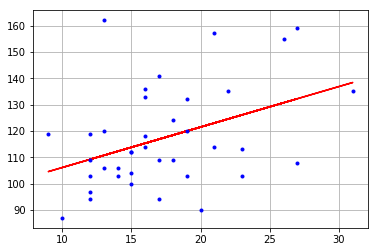

In [59]:
plt.plot(X, y_pred, "r-")
plt.plot(X, y, "b.")
plt.grid()
plt.show()

In [62]:
# predict the IQ of a 3 year old newborn with cry count 25
print("IQ of a 3 year old newborn with cry count 25 : ", lr.predict(np.array([[25]]))[0][0])

IQ of a 3 year old newborn with cry count 25 :  129.16378379874354
